# Code Starters

Note: that in a real code, all import are done first. To repeat import is not efficient.


#  Original Logistic Regression vs. Class Weights

Note: how the confusion matrix changes based on the tuning technique.

Original Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       142
           1       0.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.47      0.50      0.49       150
weighted avg       0.90      0.95      0.92       150

Confusion Matrix (Original):
                  Predicted Negative  Predicted Positive
Actual Negative                 142                   0
Actual Positive                   8                   0

Logistic Regression with Class Weights:
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       142
           1       0.07      0.50      0.12         8

    accuracy                           0.60       150
   macro avg       0.51      0.55      0.43       150
weighted avg       0.91      0.60      0.71       150

Confusion Matrix (Weighted):
                  Predicted Negative  Predicted 

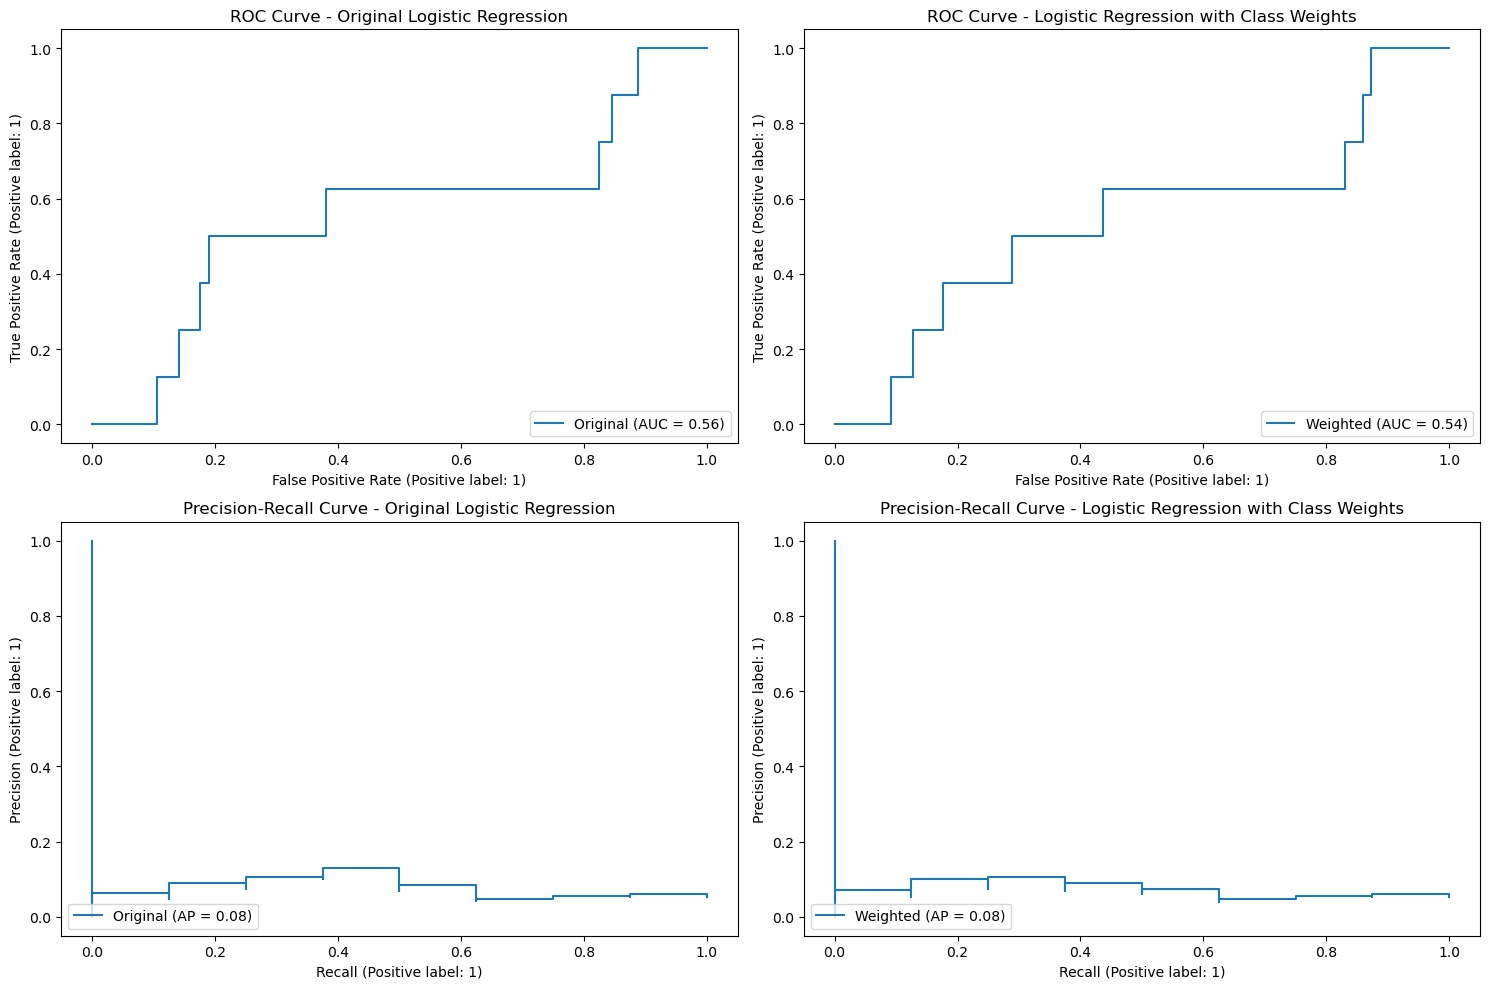

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression without enhancements
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)

# Logistic Regression with class weights
clf_weighted = LogisticRegression(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_original = clf_original.predict(X_test)
y_prob_original = clf_original.predict_proba(X_test)[:, 1]

y_pred_weighted = clf_weighted.predict(X_test)
y_prob_weighted = clf_weighted.predict_proba(X_test)[:, 1]

# Print reports
print("Original Logistic Regression:")
print(classification_report(y_test, y_pred_original, zero_division=0))
print("Confusion Matrix (Original):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_original), 
                                                      columns=['Predicted Negative', 'Predicted Positive'], 
                                                      index=['Actual Negative', 'Actual Positive']))

print("\nLogistic Regression with Class Weights:")
print(classification_report(y_test, y_pred_weighted, zero_division=0))
print("Confusion Matrix (Weighted):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_weighted), 
                                                      columns=['Predicted Negative', 'Predicted Positive'], 
                                                      index=['Actual Negative', 'Actual Positive']))

# Visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ROC Curves
roc_display_original = RocCurveDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[0, 0], name='Original')
roc_display_weighted = RocCurveDisplay.from_estimator(clf_weighted, X_test, y_test, ax=axs[0, 1], name='Weighted')

axs[0, 0].set_title("ROC Curve - Original Logistic Regression")
axs[0, 1].set_title("ROC Curve - Logistic Regression with Class Weights")

# Precision-Recall Curves
pr_display_original = PrecisionRecallDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[1, 0], name='Original')
pr_display_weighted = PrecisionRecallDisplay.from_estimator(clf_weighted, X_test, y_test, ax=axs[1, 1], name='Weighted')

axs[1, 0].set_title("Precision-Recall Curve - Original Logistic Regression")
axs[1, 1].set_title("Precision-Recall Curve - Logistic Regression with Class Weights")

plt.tight_layout()
plt.show()


Interpretation example:

In the classification report, the values `0` and `1` refer to the two classes in the binary classification problem. Specifically:

- `0` typically represents the negative class.
- `1` typically represents the positive class.

Here's a breakdown of what each metric means:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. Precision is the ability of the classifier not to label a negative sample as positive.
  - For class `0`: Precision is 0.95, meaning that 95% of the samples predicted as class `0` are actually class `0`.
  - For class `1`: Precision is 0.00, meaning that none of the samples predicted as class `1` are actually class `1` (or no samples were predicted as class `1`).

- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. Recall is the ability of the classifier to find all the positive samples.
  - For class `0`: Recall is 1.00, meaning that 100% of the actual class `0` samples were correctly predicted as class `0`.
  - For class `1`: Recall is 0.00, meaning that none of the actual class `1` samples were correctly predicted as class `1`.

- **F1-score**: The weighted average of Precision and Recall. The F1 score takes both false positives and false negatives into account.
  - For class `0`: F1-score is 0.97, which is high due to the high precision and recall.
  - For class `1`: F1-score is 0.00, which is low because both precision and recall are 0.00.

- **Support**: The number of actual occurrences of the class in the dataset.
  - For class `0`: Support is 142, indicating there are 142 samples of class `0` in the dataset.
  - For class `1`: Support is 8, indicating there are 8 samples of class `1` in the dataset.

### Interpretation

The report indicates that the classifier is performing very well on the majority class (`0`), but it is performing very poorly on the minority class (`1`). Specifically, the classifier is not predicting any samples as class `1`, leading to precision, recall, and F1-score of 0.00 for class `1`.


# Original Logistic Regression vs. SMOTE

Original Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       142
           1       0.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.47      0.50      0.49       150
weighted avg       0.90      0.95      0.92       150

Confusion Matrix (Original):
                  Predicted Negative  Predicted Positive
Actual Negative                 142                   0
Actual Positive                   8                   0

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.57      0.71       142
           1       0.06      0.50      0.11         8

    accuracy                           0.57       150
   macro avg       0.51      0.54      0.41       150
weighted avg       0.91      0.57      0.68       150

Confusion Matrix (SMOTE):
                  Predicted Negative  Predicted Positive
Ac

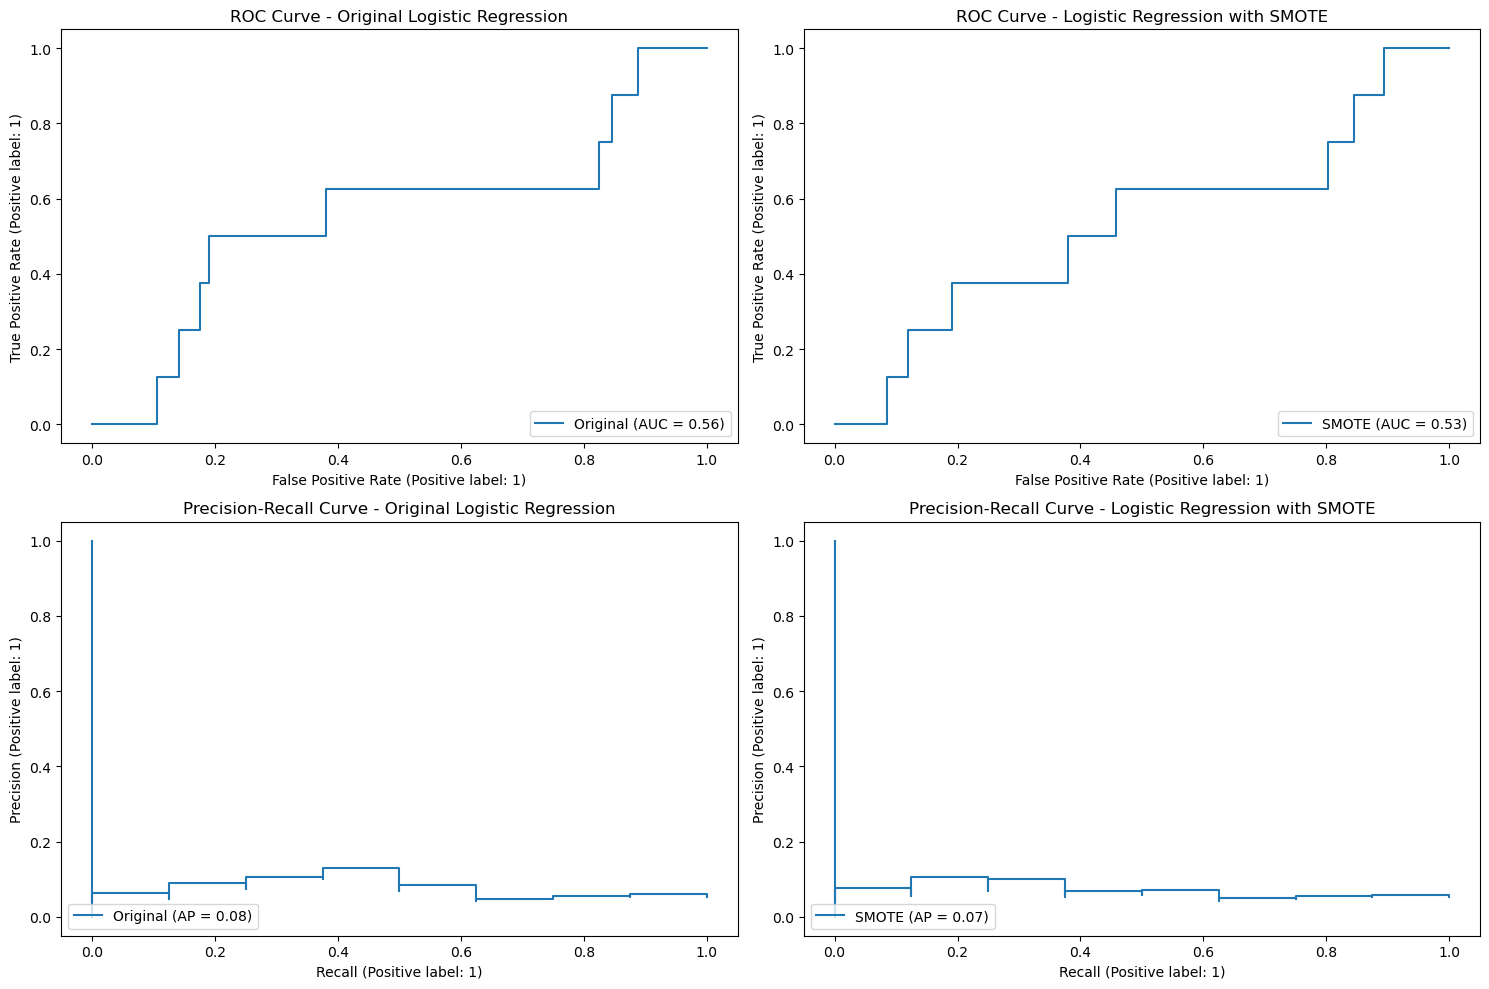

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Logistic Regression without enhancements
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)

# Logistic Regression with SMOTE
clf_smote = LogisticRegression(random_state=42)
clf_smote.fit(X_train_res, y_train_res)

# Predictions and Evaluation
y_pred_original = clf_original.predict(X_test)
y_prob_original = clf_original.predict_proba(X_test)[:, 1]

y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)[:, 1]

# Print reports
print("Original Logistic Regression:")
print(classification_report(y_test, y_pred_original, zero_division=0))
print("Confusion Matrix (Original):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_original), 
                                                      columns=['Predicted Negative', 'Predicted Positive'], 
                                                      index=['Actual Negative', 'Actual Positive']))

print("\nLogistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_smote, zero_division=0))
print("Confusion Matrix (SMOTE):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_smote), 
                                                  columns=['Predicted Negative', 'Predicted Positive'], 
                                                  index=['Actual Negative', 'Actual Positive']))

# Visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ROC Curves
roc_display_original = RocCurveDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[0, 0], name='Original')
roc_display_smote = RocCurveDisplay.from_estimator(clf_smote, X_test, y_test, ax=axs[0, 1], name='SMOTE')

axs[0, 0].set_title("ROC Curve - Original Logistic Regression")
axs[0, 1].set_title("ROC Curve - Logistic Regression with SMOTE")

# Precision-Recall Curves
pr_display_original = PrecisionRecallDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[1, 0], name='Original')
pr_display_smote = PrecisionRecallDisplay.from_estimator(clf_smote, X_test, y_test, ax=axs[1, 1], name='SMOTE')

axs[1, 0].set_title("Precision-Recall Curve - Original Logistic Regression")
axs[1, 1].set_title("Precision-Recall Curve - Logistic Regression with SMOTE")

plt.tight_layout()
plt.show()


#  Original Logistic Regression vs. Threshold Tuning

Original Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       142
           1       0.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.47      0.50      0.49       150
weighted avg       0.90      0.95      0.92       150

Confusion Matrix (Original):
                  Predicted Negative  Predicted Positive
Actual Negative                 142                   0
Actual Positive                   8                   0

Logistic Regression with Threshold Tuning:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       142
           1       0.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.47      0.50      0.49       150
weighted avg       0.90      0.95      0.92       150

Confusion Matrix (Tuned):
                  Predicted Negative  Predicted 

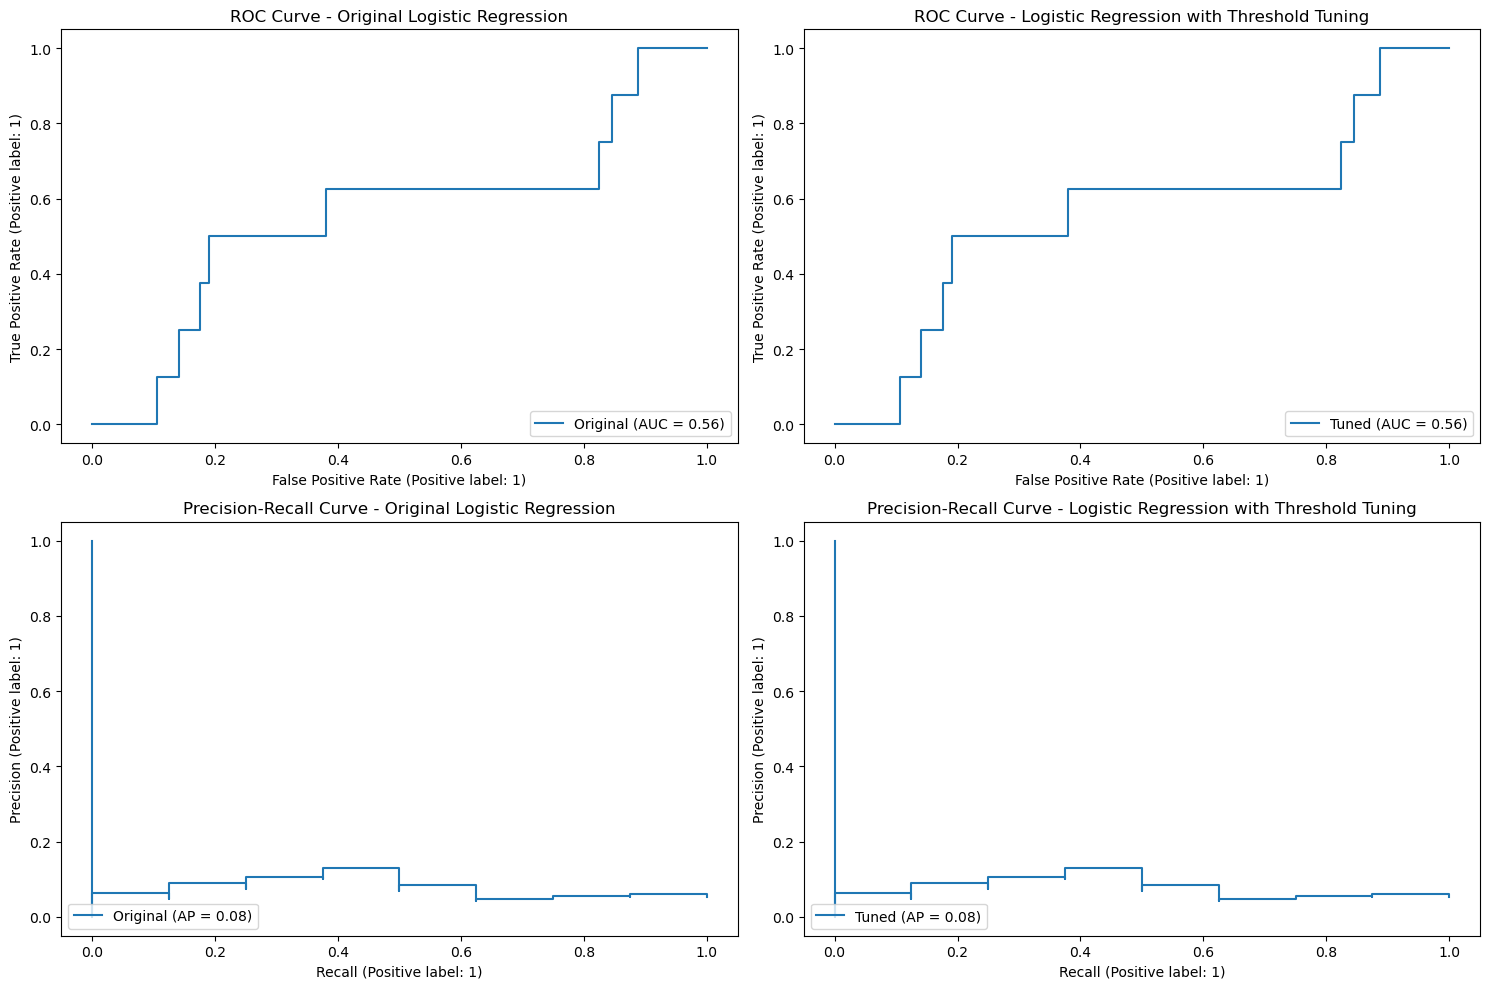

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression without enhancements
clf_original = LogisticRegression(random_state=42)
clf_original.fit(X_train, y_train)

# Logistic Regression with threshold tuning
clf_tuned = LogisticRegression(random_state=42)
clf_tuned.fit(X_train, y_train)

# Get predicted probabilities
y_prob_original = clf_original.predict_proba(X_test)[:, 1]
y_prob_tuned = clf_tuned.predict_proba(X_test)[:, 1]

# Tune threshold
threshold = 0.3  # Example threshold
y_pred_tuned = (y_prob_tuned >= threshold).astype(int)

# Predictions and Evaluation
y_pred_original = clf_original.predict(X_test)

print("Original Logistic Regression:")
print(classification_report(y_test, y_pred_original, zero_division=0))
print("Confusion Matrix (Original):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_original), 
                                                      columns=['Predicted Negative', 'Predicted Positive'], 
                                                      index=['Actual Negative', 'Actual Positive']))

print("\nLogistic Regression with Threshold Tuning:")
print(classification_report(y_test, y_pred_tuned, zero_division=0))
print("Confusion Matrix (Tuned):\n", pd.DataFrame(confusion_matrix(y_test, y_pred_tuned), 
                                                  columns=['Predicted Negative', 'Predicted Positive'], 
                                                  index=['Actual Negative', 'Actual Positive']))

# Visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ROC Curves
roc_display_original = RocCurveDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[0, 0], name='Original')
roc_display_tuned = RocCurveDisplay.from_estimator(clf_tuned, X_test, y_test, ax=axs[0, 1], name='Tuned')

axs[0, 0].set_title("ROC Curve - Original Logistic Regression")
axs[0, 1].set_title("ROC Curve - Logistic Regression with Threshold Tuning")

# Precision-Recall Curves
pr_display_original = PrecisionRecallDisplay.from_estimator(clf_original, X_test, y_test, ax=axs[1, 0], name='Original')
pr_display_tuned = PrecisionRecallDisplay.from_predictions(y_test, y_prob_tuned, ax=axs[1, 1], name='Tuned')

axs[1, 0].set_title("Precision-Recall Curve - Original Logistic Regression")
axs[1, 1].set_title("Precision-Recall Curve - Logistic Regression with Threshold Tuning")

plt.tight_layout()
plt.show()


## Grid Search for Threshold Tuning

Optimal Threshold: 0.04
Logistic Regression with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       142
           1       0.10      0.38      0.16         8

    accuracy                           0.79       150
   macro avg       0.53      0.60      0.52       150
weighted avg       0.91      0.79      0.84       150

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 116                  26
Actual Positive                   5                   3


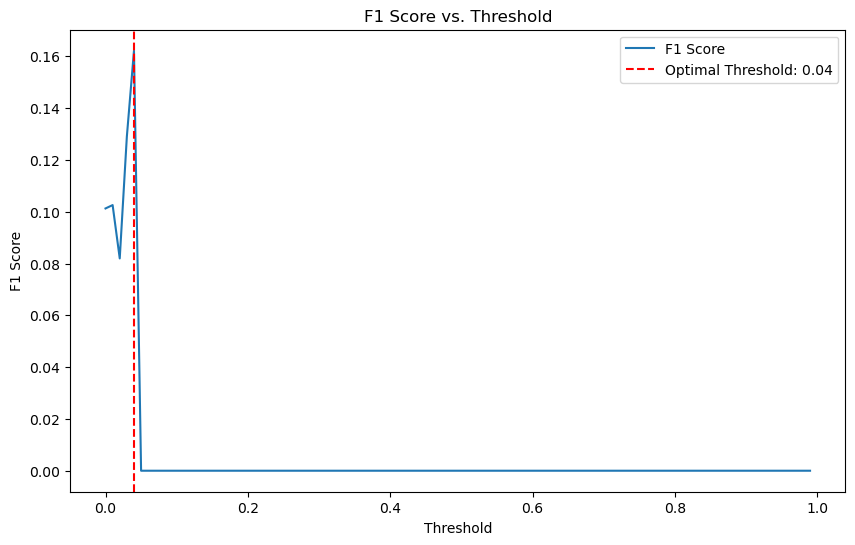

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Grid search for optimal threshold
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Predictions with optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Print reports
print("Logistic Regression with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal, zero_division=0))
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_optimal), 
                                          columns=['Predicted Negative', 'Predicted Positive'], 
                                          index=['Actual Negative', 'Actual Positive']))

# Plot F1 scores vs. thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.show()


## Random Search for Threshold Tuning

Optimal Threshold: 0.034388521115218396
Logistic Regression with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       142
           1       0.09      0.50      0.16         8

    accuracy                           0.71       150
   macro avg       0.53      0.61      0.49       150
weighted avg       0.92      0.71      0.79       150

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 103                  39
Actual Positive                   4                   4


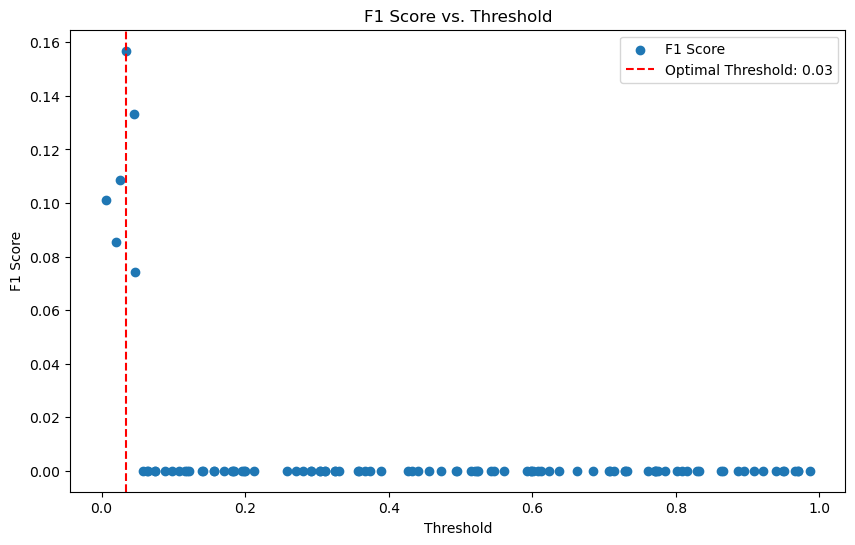

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Random search for optimal threshold
np.random.seed(42)
thresholds = np.random.uniform(0, 1, 100)
f1_scores = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal Threshold: {optimal_threshold}")

# Predictions with optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Print reports
print("Logistic Regression with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal, zero_division=0))
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_optimal), 
                                          columns=['Predicted Negative', 'Predicted Positive'], 
                                          index=['Actual Negative', 'Actual Positive']))

# Plot F1 scores vs. thresholds
plt.figure(figsize=(10, 6))
plt.scatter(thresholds, f1_scores, label='F1 Score')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.show()


Can I predict correctly all positives?

You need to set a threshold that maximizes recall for the positive class. In other words, you would set the threshold low enough to ensure that every positive instance is captured. However, this will likely come at the expense of precision, meaning you will have more false positives.

You can achieve this by examining the precision-recall curve and selecting a threshold that ensures recall is 1.0 (or very close to 1.0).

<span style="color:red">Ouch! You are predicting all instances as positive!</span>


Optimal Threshold for Maximum Recall: 0.0072227581925667465
Logistic Regression with Optimal Threshold for Maximum Recall:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.05      1.00      0.10         8

    accuracy                           0.05       150
   macro avg       0.03      0.50      0.05       150
weighted avg       0.00      0.05      0.01       150

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                   0                 142
Actual Positive                   0                   8


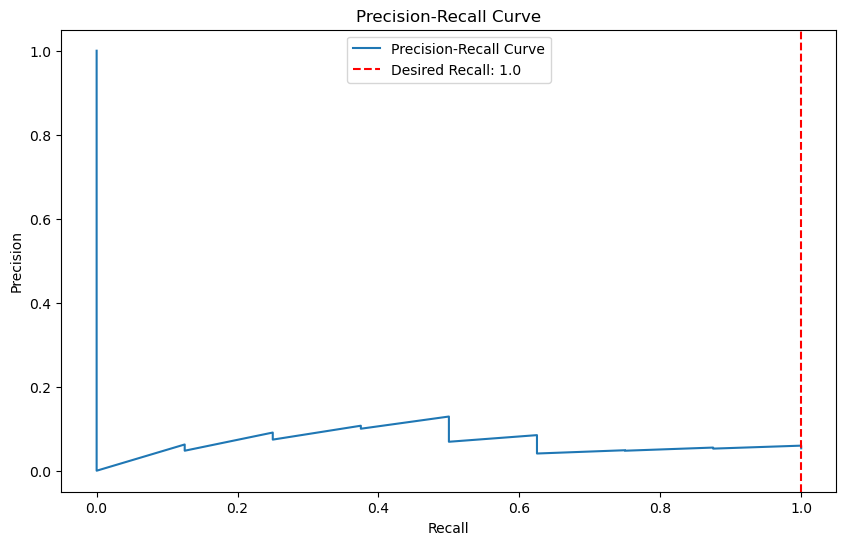

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that gives recall closest to 1.0
optimal_idx = np.argmax(recall == 1.0)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for Maximum Recall: {optimal_threshold}")

# Predictions with optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Print reports
print("Logistic Regression with Optimal Threshold for Maximum Recall:")
print(classification_report(y_test, y_pred_optimal, zero_division=0))
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred_optimal), 
                                          columns=['Predicted Negative', 'Predicted Positive'], 
                                          index=['Actual Negative', 'Actual Positive']))

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.axvline(1.0, color='r', linestyle='--', label='Desired Recall: 1.0')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


## Tuning sampling_strategy with SMOTE

(Synthetic Minority Over-sampling Technique)

### SMOTE Parameters
- **sampling_strategy**: Determines the desired balance of the minority class.
- **k_neighbors**: Number of nearest neighbors to use for generating synthetic samples.
- **random_state**: Seed for the random number generator to ensure reproducibility.

### Logistic Regression Parameters
- **C**: Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
- **penalty**: Used to specify the norm of the penalty (default is 'l2'). Other options include 'l1', 'elasticnet', and 'none'.
- **solver**: Algorithm to use in the optimization problem (e.g., 'liblinear', 'saga', 'lbfgs', 'newton-cg').
- **max_iter**: Maximum number of iterations taken for the solvers to converge.
- **class_weight**: Weights associated with classes (e.g., 'balanced' or a dictionary).


Best parameters: {'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'smote__k_neighbors': 7, 'smote__sampling_strategy': 0.5}
Best Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       142
           1       0.00      0.00      0.00         8

    accuracy                           0.86       150
   macro avg       0.47      0.45      0.46       150
weighted avg       0.89      0.86      0.88       150

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 129                  13
Actual Positive                   8                   0


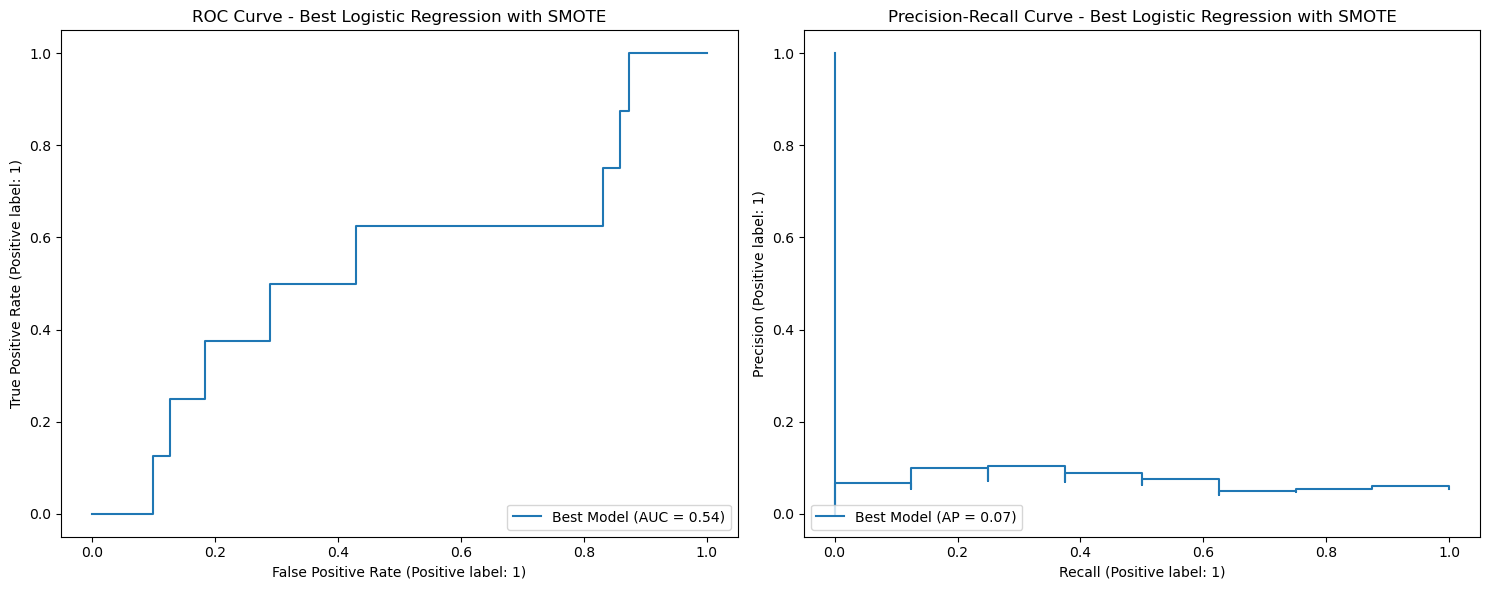

Confusion Matrix for sampling_strategy=0.1:
                  Predicted Negative  Predicted Positive
Actual Negative                 142                   0
Actual Positive                   8                   0
Confusion Matrix for sampling_strategy=0.3:
                  Predicted Negative  Predicted Positive
Actual Negative                 140                   2
Actual Positive                   8                   0
Confusion Matrix for sampling_strategy=0.5:
                  Predicted Negative  Predicted Positive
Actual Negative                 132                  10
Actual Positive                   8                   0
Confusion Matrix for sampling_strategy=0.7:
                  Predicted Negative  Predicted Positive
Actual Negative                 116                  26
Actual Positive                   6                   2
Confusion Matrix for sampling_strategy=1.0:
                  Predicted Negative  Predicted Positive
Actual Negative                  81            

In [8]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("generated_dataset_imbalanced.csv")
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),  # Standardize features
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Increase max_iter
])

# Define the parameter grid
param_grid = {
    'smote__sampling_strategy': [0.1, 0.3, 0.5, 0.7, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Print reports
print("Best Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", pd.DataFrame(cm, 
                                          columns=['Predicted Negative', 'Predicted Positive'], 
                                          index=['Actual Negative', 'Actual Positive']))

# ROC and Precision-Recall Curves
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=axs[0], name='Best Model')
axs[0].set_title("ROC Curve - Best Logistic Regression with SMOTE")

pr_display = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=axs[1], name='Best Model')
axs[1].set_title("Precision-Recall Curve - Best Logistic Regression with SMOTE")

plt.tight_layout()
plt.show()

# Displaying confusion matrix for each sampling strategy tested
sampling_strategies = [0.1, 0.3, 0.5, 0.7, 1.0]
for strategy in sampling_strategies:
    sm = SMOTE(sampling_strategy=strategy, random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    clf_smote = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000))
    ])
    clf_smote.fit(X_train_res, y_train_res)
    
    y_pred_smote = clf_smote.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred_smote)
    print(f"Confusion Matrix for sampling_strategy={strategy}:\n", pd.DataFrame(cm, 
                                                                               columns=['Predicted Negative', 'Predicted Positive'], 
                                                                               index=['Actual Negative', 'Actual Positive']))
